In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
import qiskit
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import TensoredMeasFitter
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')
print(provider)
device = provider.backend.ibmq_brooklyn
backend = provider.get_backend('ibmq_brooklyn')

<AccountProvider for IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>


In [3]:
max_size = 65 # largest graph size
print("max_size:", max_size)

max_size: 65


In [4]:
with open("./pkls/hist_list.pkl", "rb") as f:
    hist_list = pickle.load(f)

In [5]:
hists_list = hist_list["raw"]
ignis_hist_list = hist_list["ignis"]
s_lm0_hist_list = hist_list["proposed_delta"]
lnp_hist_list = hist_list["proposed_lnp"]
mooney_hist_list = hist_list["mooney_etal"]
nation_hist_list = hist_list["nation_etal"]

In [6]:
with open("./pkls/times.pkl", "rb") as f:
    total_times = pickle.load(f)

In [7]:
ignis_total_times = total_times["ignis"]
s_lm0_total_times = total_times["proposed_delta"]
lnp_total_times = total_times["proposed_lnp"]
mooney_total_times = total_times["mooney_etal"]
nation_total_times = total_times["nation_etal"]

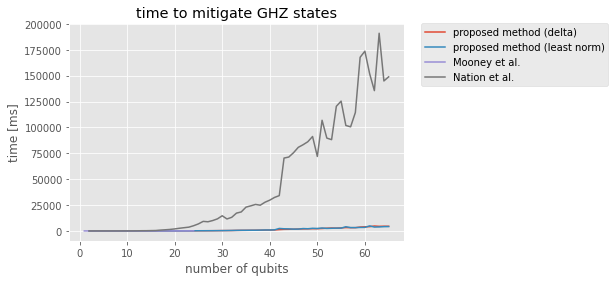

In [8]:
plt.style.use('ggplot')
plt.plot(range(2,max_size + 1), s_lm0_total_times, label="proposed method (delta)")
plt.plot(range(2,max_size + 1), lnp_total_times, label="proposed method (least norm)")
plt.plot(range(1,25 - 1 + 1), mooney_total_times, label="Mooney et al.")
plt.plot(range(2,max_size + 1), nation_total_times, label="Nation et al.")
plt.xlabel("number of qubits")
plt.ylabel("time [ms]")
plt.title("time to mitigate GHZ states")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

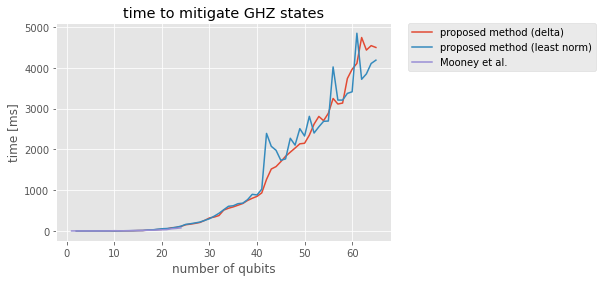

In [9]:
plt.style.use('ggplot')
plt.plot(range(2,max_size + 1), s_lm0_total_times, label="proposed method (delta)")
plt.plot(range(2,max_size + 1), lnp_total_times, label="proposed method (least norm)")
plt.plot(range(1,25 - 1 + 1), mooney_total_times, label="Mooney et al.")
plt.xlabel("number of qubits")
plt.ylabel("time [ms]")
plt.title("time to mitigate GHZ states")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [10]:
def expval_stddev(hist, one_norm = None):
    shots = 0
    expval = 0
    for key, count in hist.items():
        shots += count
        sigma_z = 1
        for s in key:
            if s == "1":
                sigma_z *= -1
        expval += sigma_z * count
    expval /= shots
    if one_norm is None:
        return expval
    else:
        stddev = one_norm / np.sqrt(shots)
        return expval, stddev

In [11]:
with open("./pkls/one_norms.pkl", "rb") as f:
    one_norms = pickle.load(f)

In [12]:
raw_expvals = []
# raw_stddevs = []
for hist in hists_list[::2]:
    expval = expval_stddev(hist)
    raw_expvals.append(expval)
    # raw_stddevs.append(stddev)

In [13]:
ignis_expvals = []
# ignis_stddevs = []
for hist in ignis_hist_list[::2]:
    expval = expval_stddev(hist)
    ignis_expvals.append(expval)
    # ignis_stddevs.append(stddev)

In [14]:
s_lm0_expvals = []
s_lm0_stddevs = []
for hist, one_norm in zip(s_lm0_hist_list[::2], one_norms[::2]):
    expval, stddev = expval_stddev(hist, one_norm)
    s_lm0_expvals.append(expval)
    s_lm0_stddevs.append(stddev)

In [15]:
lnp_expvals = []
lnp_stddevs = []
for hist, one_norm in zip(s_lm0_hist_list[::2], one_norms[::2]):
    expval, stddev = expval_stddev(hist, one_norm)
    lnp_expvals.append(expval)
    lnp_stddevs.append(stddev)

In [16]:
mooney_expvals = []
# mooney_stddevs = []
for hist in mooney_hist_list[:30:2]:
    expval = expval_stddev(hist)
    mooney_expvals.append(expval)
    # mooney_stddevs.append(stddev)

In [17]:
nation_expvals = []
nation_stddevs = []
for hist in nation_hist_list[::2]:
    expval = hist[0].expval()
    stddev = hist[0].stddev()
    nation_expvals.append(expval)
    nation_stddevs.append(stddev)

In [18]:
with open("./pkls/expvals.pkl", "wb") as f:
    pickle.dump({"raw": raw_expvals, "ignis": ignis_expvals, "proposed_delta": s_lm0_expvals, "proposed_lnp": lnp_expvals, "mooney_etal": mooney_expvals, "nation_etal": nation_expvals}, f)

In [19]:
with open("./pkls/stddevs.pkl", "wb") as f:
    pickle.dump({"proposed_delta": s_lm0_stddevs, "proposed_lnp": lnp_stddevs, "nation_etal": nation_stddevs}, f)
# with open("./pkls/stddevs.pkl", "wb") as f:
#     pickle.dump({"raw": raw_stddevs, "ignis": ignis_stddevs, "proposed_delta": s_lm0_stddevs, "proposed_lnp": lnp_stddevs, "mooney_etal": mooney_stddevs, "nation_etal": nation_stddevs}, f)

In [20]:
with open("./pkls/expvals.pkl", "rb") as f:
    expvals = pickle.load(f)

In [21]:
raw_expvals = expvals["raw"]
ignis_expvals = expvals["ignis"]
s_lm0_expvals = expvals["proposed_delta"]
lnp_expvals = expvals["proposed_lnp"]
mooney_expvals = expvals["mooney_etal"]
nation_expvals = expvals["nation_etal"]

In [22]:
with open("./pkls/stddevs.pkl", "rb") as f:
    stddevs = pickle.load(f)

In [23]:
# raw_stddevs = stddevs["raw"]
# ignis_stddevs = stddevs["ignis"]
s_lm0_stddevs = stddevs["proposed_delta"]
lnp_stddevs = stddevs["proposed_lnp"]
# mooney_stddevs = stddevs["mooney_etal"]
nation_stddevs = stddevs["nation_etal"]

In [18]:
def plot_expvals(max_size,
                 range_list,
                 corrs_list,
                 stddevs_list,
                 labels,
                 title = None,
                 xlabel = "number of qubits",
                 ylabel = "expectation value"):
    plt.clf()
    plt.style.use('ggplot')
    for i in range(len(corrs_list)):
        if corrs_list[i] is None:
            continue
        corrs = np.asarray(corrs_list[i])
        if stddevs_list[i] is not None:
            stddevs = np.asarray(stddevs_list[i])
            plt.fill_between(range_list[i], corrs - stddevs, corrs + stddevs, alpha=0.2, color="C"+str(i))
        plt.plot(range_list[i], corrs, label = labels[i], color="C"+str(i))
        # plt.errorbar(list(range(1, len(corrs_list[i]) + 1)), corrs_list[i], label=labels[i], fmt=markers[i], yerr=stddevs_list[i], capsize=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(list(range(max_size + 2))[::5])
    plt.title(title)
    plt.show()

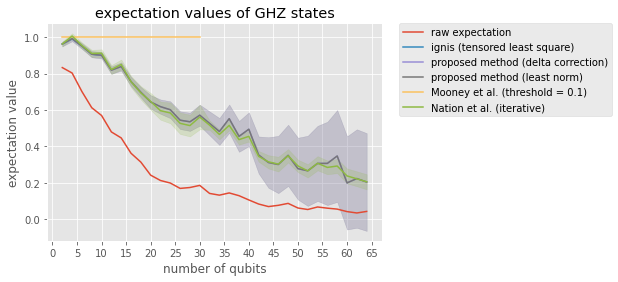

In [19]:
plot_expvals(max_size, 
             [range(2,max_size + 1)[::2], range(2,10 + 1)[::2], range(2,max_size + 1)[::2], range(2,max_size + 1)[::2], range(2,31)[::2], range(2,max_size + 1)[::2]],
             [raw_expvals, ignis_expvals, s_lm0_expvals, lnp_expvals, mooney_expvals, nation_expvals], 
             [None, None, s_lm0_stddevs, lnp_stddevs, None, nation_stddevs], 
             ["raw expectation", "ignis (tensored least square)", "proposed method (delta correction)", "proposed method (least norm)", "Mooney et al. (threshold = 0.1)", "Nation et al. (iterative)"],
             "expectation values of GHZ states")

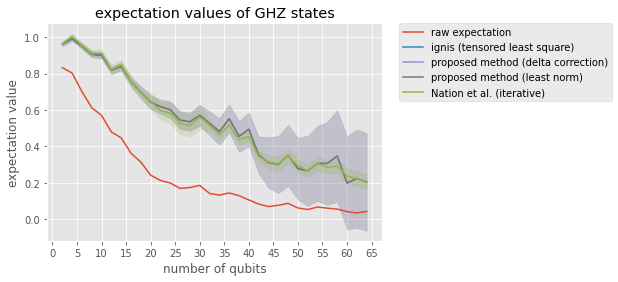

In [19]:
plot_expvals(max_size, 
             [range(2,max_size + 1)[::2], range(2,10 + 1)[::2], range(2,max_size + 1)[::2], range(2,max_size + 1)[::2], range(2,31)[::2], range(2,max_size + 1)[::2]],
             [raw_expvals, ignis_expvals, s_lm0_expvals, lnp_expvals, None, nation_expvals], 
             [None, None, s_lm0_stddevs, lnp_stddevs, None, nation_stddevs],
             ["raw expectation", "ignis (tensored least square)", "proposed method (delta correction)", "proposed method (least norm)", None, "Nation et al. (iterative)"],
             "expectation values of GHZ states")

ValueError: operands could not be broadcast together with shapes (5,) (32,) 

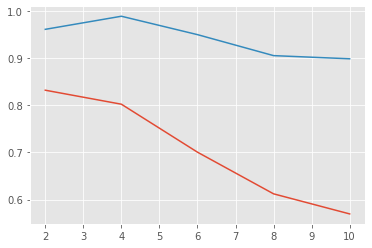

In [22]:
plot_expvals(max_size, 
             [range(2,10 + 1)[::2], range(2,10 + 1)[::2], range(2,10 + 1)[::2], range(2,10 + 1)[::2], range(2,10 + 1)[::2], range(2,10 + 1)[::2]],
             [raw_expvals[:5], ignis_expvals[:5], s_lm0_expvals[:5], lnp_expvals[:5], None, nation_expvals[:5]], 
             [None, None, s_lm0_stddevs, lnp_stddevs, None, nation_stddevs],
             ["raw expectation", "ignis (tensored least square)", "proposed method (delta correction)", "proposed method (least norm)", None, "Nation et al. (iterative)"],
             "expectation values of GHZ states")

In [7]:
def sum_of_hist(hist):
    s = 0
    for key, val in hist.items():
        s += val
    return s

In [8]:
lnp_hist_sum_list = []
for hist in lnp_hist_list:
    lnp_hist_sum_list.append(sum_of_hist(hist))

In [9]:
s_lm0_hist_sum_list = []
for hist in s_lm0_hist_list:
    s_lm0_hist_sum_list.append(sum_of_hist(hist))

In [28]:
nation_hist_sum_list = []
for hist, _ in nation_hist_list:
    nation_hist_sum_list.append(sum_of_hist(hist) * 8192)

In [13]:
mooney_hist_sum_list = []
for hist in mooney_hist_list:
    mooney_hist_sum_list.append(sum_of_hist(hist))

In [14]:
ignis_hist_sum_list = []
for hist in ignis_hist_list:
    ignis_hist_sum_list.append(sum_of_hist(hist))

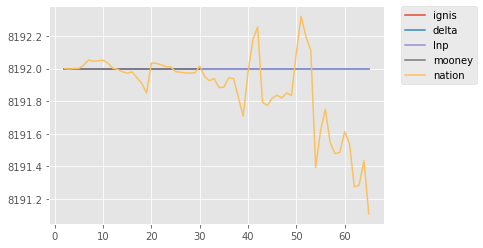

In [32]:
plt.clf()
plt.style.use('ggplot')
plt.plot(range(2,10 + 1), ignis_hist_sum_list, label="ignis")
plt.plot(range(2,max_size + 1), s_lm0_hist_sum_list, label="delta")
plt.plot(range(2,max_size + 1), lnp_hist_sum_list, label="lnp")
plt.plot(range(2,30 + 1), mooney_hist_sum_list, label="mooney")
plt.plot(range(2,max_size + 1), nation_hist_sum_list, label="nation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)